## 1. 사용할 패키지 불러오기

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [5]:
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/H2GTRE.ttf").get_name()
rc('font', family=font_name)

## 2. 데이터 불러오기

In [6]:
data = pd.read_csv('data.csv')
data.head()

,HUMAN ID,성별,ISO나이,나이,오른쪽어깨경사각,왼쪽어깨경사각,머리위로뻗은주먹높이,키,눈높이,목뒤높이,...,왼쪽상체근육발달,오른쪽상체근육발달,왼쪽하체근육발달,오른쪽하체근육발달,몸통근육발달,왼쪽상체체지방,오른쪽상체체지방,왼쪽하체체지방,오른쪽하체체지방,몸통체지방
0,120100196,남,7.48,7,18.0,22.0,1543.0,1330.0,1215.0,1111.0,...,표하,표하,표하,표하,표하,표상,표상,표상,표상,표상
1,120100197,남,7.07,7,24.0,26.0,1305.0,1160.0,1053.0,970.0,...,표준,표준,표상,표상,표준,표준,표준,표준,표준,표하
2,120100198,남,7.49,7,16.0,26.0,1487.0,1243.0,1131.0,1021.0,...,표하,표준,표하,표하,표준,표상,표준,표준,표준,표하
3,120100199,남,7.32,7,31.0,26.0,1280.0,1144.0,1020.0,913.0,...,표하,표하,표하,표하,표상,표상,표상,표상,표상,표하
4,120100200,남,6.71,7,19.0,24.0,1480.0,1277.0,1165.0,1055.0,...,표준,표준,표하,표하,표준,표상,표상,표상,표상,표상


## 3. 데이터 전처리

### (1) 결측치가 있는 ID 제거

In [7]:
data.isnull().sum()

HUMAN ID       0
성별             0
ISO나이          0
나이             0
오른쪽어깨경사각       0
            ... 
왼쪽상체체지방     1122
오른쪽상체체지방    1122
왼쪽하체체지방     1122
오른쪽하체체지방    1122
몸통체지방       1122
Length: 157, dtype: int64

#### 5000개 이상 결측치가 있는 변수 제거

In [8]:
del data['젖꼭지사이수평길이']
del data['젖가슴아래둘레']
del data['목옆젖꼭지길이']

#### 결측치 제거

In [9]:
data = data.dropna().reset_index(drop = True)

### (2) 독립 변수와 종속 변수 분할

In [10]:
independent_variable = ['키','몸무게','BMI','가슴너비','허리너비','엉덩이너비','목둘레','가슴둘레','배둘레','허리둘레','엉덩이둘레','장딴지둘레','종아리최소둘레']
target_variable = ['체지방률', '체지방률평가']

### (3) 변수 사이의 상관관계 확인

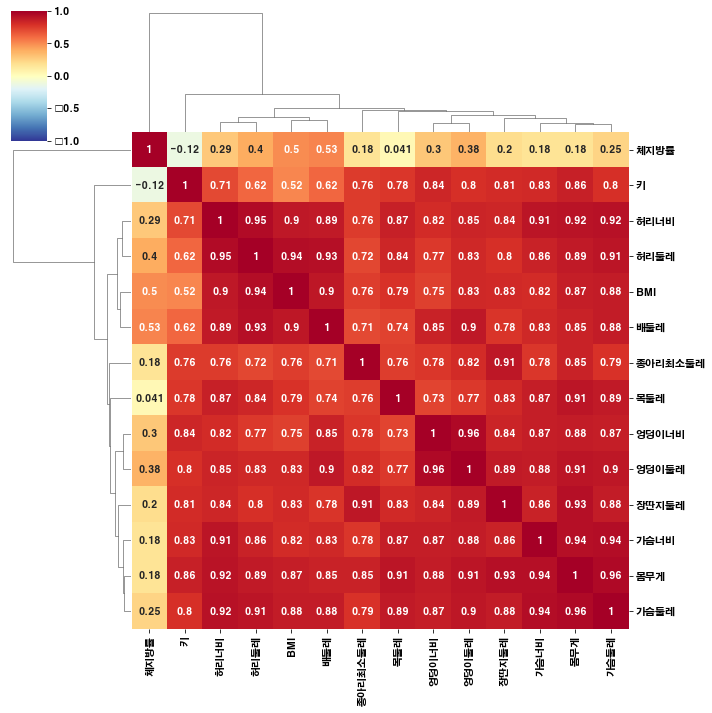

In [12]:
corr_data = data.loc[:, independent_variable + ['체지방률']]
corr_data = corr_data.corr()

sns.clustermap(corr_data, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

### (4) 연속형 변수 정규화 (Min-max 정규화)

In [17]:
X = data.loc[:, independent_variable]

minmax_scaler = MinMaxScaler()
minmax_scaler = minmax_scaler.fit_transform(X)
X.loc[:, independent_variable] = minmax_scaler
X.head()

,키,몸무게,BMI,가슴너비,허리너비,엉덩이너비,목둘레,가슴둘레,배둘레,허리둘레,엉덩이둘레,장딴지둘레,종아리최소둘레
0,0.318058,0.169143,0.261468,0.203791,0.254851,0.303896,0.226244,0.252308,0.317147,0.289969,0.344715,0.311787,0.311085
1,0.124923,0.029714,0.100917,0.075829,0.035152,0.102932,0.149321,0.115385,0.065250,0.092476,0.092683,0.110266,0.075874
2,0.219219,0.077714,0.146789,0.213270,0.241669,0.191160,0.180995,0.170769,0.154780,0.163009,0.182114,0.231939,0.159336
3,0.106746,0.035429,0.142202,0.203791,0.145002,0.112735,0.226244,0.110769,0.078907,0.095611,0.141463,0.133080,0.151749
4,0.257846,0.232000,0.481651,0.345643,0.432208,0.382320,0.330317,0.352308,0.438311,0.414546,0.414634,0.395437,0.447659


### (5) Train Test 분할

In [21]:
train_X, test_X, train_y, test_y = train_test_split(X, data['체지방률'], test_size=0.3, random_state=17)

## 4. 머신러닝 모델

In [ ]:
RMSE_list = []
R2_list = []

### (1) 선형 회귀 분석

In [40]:
reg_model = LinearRegression().fit(train_X, train_y)

#### - Test 성능 관찰

In [41]:
test_predict = reg_model.predict(test_X)

RMSE_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
R2_list.append(r2_score(test_y, test_predict))

print("RMSE: {}".format(np.sqrt(mean_squared_error(test_y, test_predict))))
print("R2: {}".format(r2_score(test_y, test_predict)))

RMSE: 3.7646907622766266
R2: 0.7409732356978098


In [ ]:
plt.scatter(test_y, test_predict, alpha=0.3)
plt.ylim([5, 50])
plt.xlim([5, 50])
plt.ylabel('predict')
plt.xlabel('true')

### (2) 의사결정 나무

#### - 하이퍼 파라미터 튜닝

In [44]:
max_depth_candidate = [3, 5, 7, 9, 11]
min_samples_split_candidate = [5, 7, 9, 11, 13]

# 결과를 저장할 빈 리스트 생성
max_depth_list = []
min_samples_split_list = []
train_score_list = []
val_score_list = []

# Decision Tree의 max_depth 파라미터에 대해서
for max_depth in max_depth_candidate:
    # Decision Tree의 min_samples_split 파라미터에 대해서
    for min_samples_split in min_samples_split_candidate:
        # 모델 생성 및 학습
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state = 1004).fit(train_X, train_y)
        # Train 데이터에 대한 결과 확인
        train_predict = model.predict(train_X)
        train_score_list.append(np.sqrt(mean_squared_error(train_y, train_predict)))
        # Test 데이터에 대한 결과 확인
        test_predict = model.predict(test_X)
        val_score_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
        # Parameter 저장
        max_depth_list.append(max_depth)
        min_samples_split_list.append(min_samples_split)
            
result = pd.DataFrame({"max_depth": max_depth_list, "min_samples_split": min_samples_split_list, 'Train Score': train_score_list, 'Test Score': val_score_list})
result   

,max_depth,min_samples_split,Train Score,Test Score
0,3,5,5.153799,5.169130
1,3,7,5.153799,5.169130
2,3,9,5.153799,5.169130
3,3,11,5.153799,5.169130
4,3,13,5.153799,5.169130
5,5,5,4.251826,4.368733
6,5,7,4.251826,4.368733
7,5,9,4.251826,4.368733
8,5,11,4.251826,4.368733
9,5,13,4.251826,4.368733


In [46]:
result = result.loc[result['Test Score'] == min(result['Test Score']), :].reset_index(drop = True)
dt_model = DecisionTreeRegressor(max_depth=result['max_depth'][0], min_samples_split=result['min_samples_split'][0], random_state = 1004).fit(train_X, train_y)
result

,max_depth,min_samples_split,Train Score,Test Score
0,7,9,3.70144,4.154514
1,7,11,3.70144,4.154514
2,7,13,3.70144,4.154514


#### - Test 성능 관찰

In [47]:
test_predict = dt_model.predict(test_X)

RMSE_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
R2_list.append(r2_score(test_y, test_predict))

print("RMSE: {}".format(np.sqrt(mean_squared_error(test_y, test_predict))))
print("R2: {}".format(r2_score(test_y, test_predict)))

RMSE: 4.154514208551437
R2: 0.6845529132053148


In [ ]:
plt.scatter(test_y, test_predict, alpha=0.3)
plt.ylim([5, 50])
plt.xlim([5, 50])
plt.ylabel('predict')
plt.xlabel('true')

### (3) SVM

#### - 하이퍼 파라미터 튜닝

In [51]:
kernel_candidate = ['linear', 'rbf', 'poly']
C_candidate = [1, 10, 100]

# 결과를 저장할 빈 리스트 생성
kernel_list = []
C_list = []
train_score_list = []
val_score_list = []

# SVR의 kernel 파라미터에 대해서
for kernel in kernel_candidate:
    # SVR의 C 파라미터에 대해서
    for C in C_candidate:
        # 모델 생성 및 학습
        model = SVR(kernel=kernel, C=C).fit(train_X, train_y)
        # Train 데이터에 대한 결과 확인
        train_predict = model.predict(train_X)
        train_score_list.append(np.sqrt(mean_squared_error(train_y, train_predict)))
        # Test 데이터에 대한 결과 확인
        test_predict = model.predict(test_X)
        val_score_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
        # Parameter 저장
        kernel_list.append(kernel)
        C_list.append(C)
            
result = pd.DataFrame({"kernel": kernel_list, "C": C_list, 'Train Score': train_score_list, 'Test Score': val_score_list})
result   

,kernel,C,Train Score,Test Score
0,linear,1,3.895900,3.789174
1,linear,10,3.852963,3.769837
2,linear,100,3.852677,3.775870
3,rbf,1,3.562202,3.530411
4,rbf,10,3.458637,3.464524
5,rbf,100,3.368989,3.477110
6,poly,1,3.813554,3.787078
7,poly,10,3.688984,3.690740
8,poly,100,3.598033,3.640024


In [52]:
result = result.loc[result['Test Score'] == min(result['Test Score']), :].reset_index(drop = True)
svm_model = model = SVR(kernel=result['kernel'][0], C=result['C'][0]).fit(train_X, train_y).fit(train_X, train_y)
result

,kernel,C,Train Score,Test Score
0,rbf,10,3.458637,3.464524


#### - Test 성능 관찰

In [53]:
test_predict = svm_model.predict(test_X)

RMSE_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
R2_list.append(r2_score(test_y, test_predict))

print("RMSE: {}".format(np.sqrt(mean_squared_error(test_y, test_predict))))
print("R2: {}".format(r2_score(test_y, test_predict)))

RMSE: 3.46452382356662
R2: 0.7806320746751291


Text(0.5, 0, 'true')

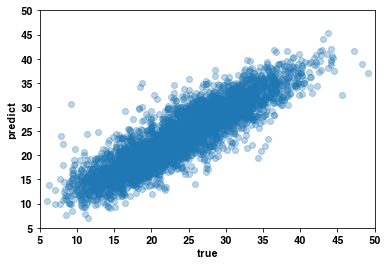

In [54]:
plt.scatter(test_y, test_predict, alpha=0.3)
plt.ylim([5, 50])
plt.xlim([5, 50])
plt.ylabel('predict')
plt.xlabel('true')

#### - Test 성능 관찰

### (4) Random Forest

#### - 하이퍼 파라미터 튜닝

In [55]:
n_estimators_candidate = [100, 300,500]
max_depth_candidate = [3, 5, 7]
min_samples_split_candidate = [5, 7, 9]

# 결과를 저장할 빈 리스트 생성
n_estimators_list = []
max_depth_list = []
min_samples_split_list = []
train_score_list = []
val_score_list = []

# Random Forest의 n_estimators 파라미터에 대해서
for n_estimators in n_estimators_candidate:
    # Random Forest의 max_depth 파라미터에 대해서
    for max_depth in max_depth_candidate:
        # Random Forest의 min_samples_split 파라미터에 대해서
        for min_samples_split in min_samples_split_candidate:
            # 모델 생성 및 학습
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state = 1004).fit(train_X, train_y)
            # Train 데이터에 대한 결과 확인
            train_predict = model.predict(train_X)
            train_score_list.append(np.sqrt(mean_squared_error(train_y, train_predict)))
            # Test 데이터에 대한 결과 확인
            test_predict = model.predict(test_X)
            val_score_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
            # Parameter 저장
            n_estimators_list.append(n_estimators)
            max_depth_list.append(max_depth)
            min_samples_split_list.append(min_samples_split)
            
result = pd.DataFrame({"n_estimators": n_estimators_list, "max_depth": max_depth_list, "min_samples_split": min_samples_split_list, 'Train Score': train_score_list, 'Test Score': val_score_list})
result   

,n_estimators,max_depth,min_samples_split,Train Score,Test Score
0,100,3,5,4.944611,4.956550
1,100,3,7,4.944611,4.956550
2,100,3,9,4.944611,4.956550
3,100,5,5,3.962825,4.058111
4,100,5,7,3.962847,4.058137
5,100,5,9,3.962866,4.058126
6,100,7,5,3.430904,3.767253
7,100,7,7,3.432914,3.766448
8,100,7,9,3.435318,3.766806
9,300,3,5,4.935172,4.944861


In [56]:
result = result.loc[result['Test Score'] == min(result['Test Score']), :].reset_index(drop = True)
rf_model = RandomForestRegressor(n_estimators=result['n_estimators'][0], max_depth=result['max_depth'][0], min_samples_split=result['min_samples_split'][0], random_state = 1004).fit(train_X, train_y)
result

,n_estimators,max_depth,min_samples_split,Train Score,Test Score
0,500,7,7,3.422835,3.755588


#### - Test 성능 관찰

In [57]:
test_predict = rf_model.predict(test_X)

RMSE_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
R2_listappend(r2_score(test_y, test_predict))

print("RMSE: {}".format(np.sqrt(mean_squared_error(test_y, test_predict))))
print("R2: {}".format(r2_score(test_y, test_predict)))

RMSE: 3.7555878211024902
R2: 0.7422243635404129


Text(0.5, 0, 'true')

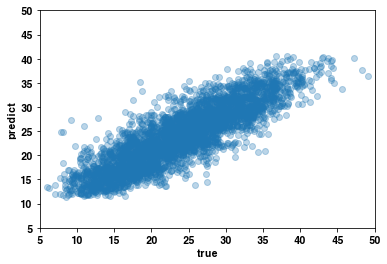

In [58]:
plt.scatter(test_y, test_predict, alpha=0.3)
plt.ylim([5, 50])
plt.xlim([5, 50])
plt.ylabel('predict')
plt.xlabel('true')

### (5) XGBoost

#### - 하이퍼 파라미터 튜닝

In [26]:
n_estimators_candidate = [100, 200, 300,400,500]
max_depth_candidate = [3, 5, 7, 9]
learning_rate_candidate = [0.1, 0.01, 0.001, 0.0001]

# 결과를 저장할 빈 리스트 생성
n_estimators_list = []
max_depth_list = []
learning_rate_list = []
train_score_list = []
val_score_list = []

# XGBoost의 n_estimators 파라미터에 대해서
for n_estimators in n_estimators_candidate:
    # XGBoost의 max_depth 파라미터에 대해서
    for max_depth in max_depth_candidate:
        # XGBoost의 learning_rate 파라미터에 대해서
        for learning_rate in learning_rate_candidate:
            # 모델 생성 및 학습
            model = xgboost.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, objective='reg:squarederror').fit(train_X, train_y)
            # Train 데이터에 대한 결과 확인
            train_predict = model.predict(train_X)
            train_score_list.append(np.sqrt(mean_squared_error(train_y, train_predict)))
            # Test 데이터에 대한 결과 확인
            test_predict = model.predict(test_X)
            val_score_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
            # Parameter 저장
            n_estimators_list.append(n_estimators)
            max_depth_list.append(max_depth)
            learning_rate_list.append(learning_rate)
            
result = pd.DataFrame({"n_estimators": n_estimators_list, "max_depth": max_depth_list, "learning_rate": learning_rate_list, 'Train Score': train_score_list, 'Test Score': val_score_list})
result                    

,n_estimators,max_depth,learning_rate,Train Score,Test Score
0,100,3,0.1000,3.482311,3.643019
1,100,3,0.0100,10.138144,9.880003
2,100,3,0.0010,22.755483,22.422382
3,100,3,0.0001,24.793379,24.449500
4,100,5,0.1000,3.058752,3.571477
...,...,...,...,...,...
75,500,7,0.0001,23.847609,23.514179
76,500,9,0.1000,0.242588,3.717442
77,500,9,0.0100,2.014400,3.643104
78,500,9,0.0010,15.502855,15.285822


In [27]:
result = result.loc[result['Test Score'] == min(result['Test Score']), :].reset_index(drop = True)
xgb_model = xgboost.XGBRegressor(n_estimators=result['n_estimators'][0], max_depth=result['max_depth'][0], learning_rate=result['learning_rate'][0], objective='reg:squarederror').fit(train_X, train_y)
result

,n_estimators,max_depth,learning_rate,Train Score,Test Score
0,200,5,0.1,2.75414,3.569193


#### - Test 성능 관찰

In [28]:
test_predict = xgb_model.predict(test_X)

RMSE_list.append(np.sqrt(mean_squared_error(test_y, test_predict)))
R2_list.__add__append(r2_score(test_y, test_predict))

print("RMSE: {}".format(np.sqrt(mean_squared_error(test_y, test_predict))))
print("R2: {}".format(r2_score(test_y, test_predict)))

RMSE: 3.569192991146985
R2: 0.7671768896809998


Text(0.5, 0, 'true')

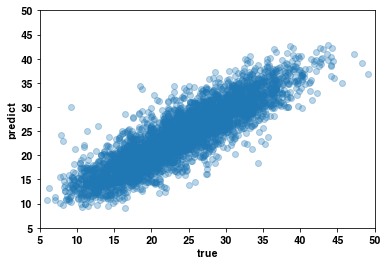

In [37]:
plt.scatter(test_y, test_predict, alpha=0.3)
plt.ylim([5, 50])
plt.xlim([5, 50])
plt.ylabel('predict')
plt.xlabel('true')

## 5. 최종 성능 평가

In [59]:
Models = ['Linear Regression', 'Decision Tree', 'SVM', 'Random Forest', 'XGBoost']
final_result = pd.DataFrame({'Model': Models, 'RMSE': RMSE_list , 'R2': R2_list})
final_result

,Model,RMSE,R2
0,Linear Regression,3.764691,0.740973
1,Decision Tree,4.154514,0.684553
2,SVM,3.464524,0.780632
3,Random Forest,3.755588,0.742224
4,XGBoost,3.569193,0.767177


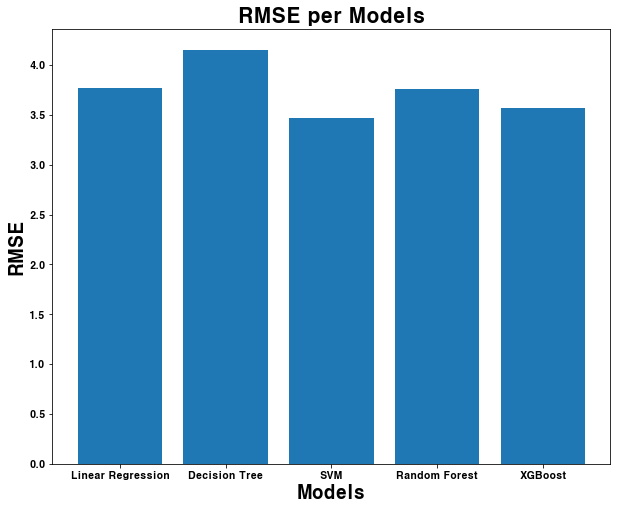

In [64]:
plt.figure(figsize=(10,8))
plt.bar(Models, RMSE_list)
plt.title('RMSE per Models', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.show()

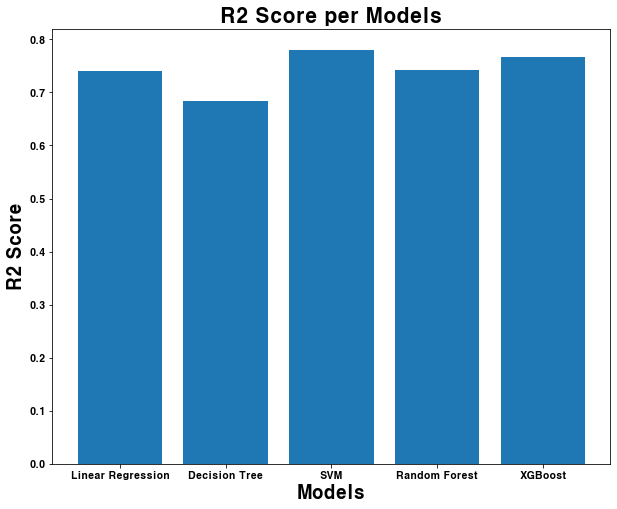

In [65]:
plt.figure(figsize=(10,8))
plt.bar(Models, R2_list)
plt.title('R2 Score per Models', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('R2 Score', fontsize=18)
plt.show()